<a href="https://colab.research.google.com/github/ioos/ioos_metrics/blob/main/GTS_Totals_weather_act.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IOOS GTS Statistics

Created: 2020-10-10

Updated: 2023-06-23

The Global Telecommunication System (GTS) is a coordinated effort for rapid distribution of observations.
The GTS monthly reports show the number of messages released to GTS for each station.
The reports contain the following fields:

- location ID: Identifier that station messages are released under to the GTS;
- region: Designated IOOS Regional Association (only for IOOS regional report);
- sponsor: Organization that owns and maintains the station;
- Met: Total number of met messages released to the GTS
- Wave: Total number of wave messages released to the GTS

In this notebook we will explore all of the statistics of the messages IOOS is releasing to GTS.

NDBC has data going back to 2018-01-01, this notebook uses all of those data for plotting and statistics.


IOOS has added the csv files to https://erddap.ioos.us/erddap/search/index.html?page=1&itemsPerPage=1000&searchFor=GTS

Source data can be found at NDBC ioosstats server that [hosts the CSV files](https://www.ndbc.noaa.gov/ioosstats/) with the ingest data.

In [1]:
import pandas as pd

url_ioos = "https://erddap.ioos.us/erddap/tabledap/gts_regional_statistics.csvp"
df_ioos = pd.read_csv(url_ioos,parse_dates=[2])
df_ioos["source"] = "IOOS"

url_ndbc = "https://erddap.ioos.us/erddap/tabledap/gts_ndbc_statistics.csvp"
df_ndbc = pd.read_csv(url_ndbc,parse_dates=[2])
df_ndbc["source"] = "NDBC"

url_nonndbc = "https://erddap.ioos.us/erddap/tabledap/gts_non_ndbc_statistics.csvp"
df_nonndbc = pd.read_csv(url_nonndbc,parse_dates=[2])
df_nonndbc["source"] = "non-NDBC"

df_out = pd.concat([df_ioos,df_ndbc,df_nonndbc])

df_out.sample(10)

,Year,Month,time (UTC),locationID,region,sponsor,met,wave,source
3256,2019,11,2019-11-01 00:00:00+00:00,42012,NaN,NATIONAL WEATHER SERVICE,8614,1436,NDBC
23127,2021,9,2021-09-01 00:00:00+00:00,MZXC1,NaN,NOAA NOS PHYSICAL OCEANOGRAPHIC RT SYSTEM PROGRAM,14372,0,non-NDBC
12162,2023,10,2023-10-01 00:00:00+00:00,WCXA2,AOOS,MARINE EXCHANGE OF ALASKA,8654,0,IOOS
13713,2020,4,2020-04-01 00:00:00+00:00,46248,NaN,SCRIPPS WAVERIDER COASTAL DATA INFORMATION PRO...,0,2844,non-NDBC
1584,2018,11,2018-11-01 00:00:00+00:00,46041,NaN,NATIONAL WEATHER SERVICE,1432,1432,NDBC
1066,2018,3,2018-03-01 00:00:00+00:00,LJPC1,NaN,SCRIPPS WAVERIDER COASTAL DATA INFORMATION PRO...,1484,1480,non-NDBC
24930,2022,1,2022-01-01 00:00:00+00:00,NSTP6,NaN,NATIONAL OCEAN SERVICE,0,0,non-NDBC
20170,2021,4,2021-04-01 00:00:00+00:00,LDTM4,NaN,NATIONAL OCEAN SERVICE,13764,0,non-NDBC
34674,2023,7,2023-07-01 00:00:00+00:00,ITKA2,NaN,NATIONAL OCEAN SERVICE,14670,0,non-NDBC
25526,2022,2,2022-02-01 00:00:00+00:00,MYPF1,NaN,NATIONAL OCEAN SERVICE,13354,0,non-NDBC


# What's non-NDBC composed of?

In [2]:
import matplotlib.pyplot as plt
import numpy as np

df_nonndbc["total"] = df_nonndbc["met"] + df_nonndbc["wave"]
df_nonndbc["time (UTC)"] = df_nonndbc["time (UTC)"].dt.tz_localize(None)

nonndbc_group = df_nonndbc.groupby(by=["sponsor"])

grp = nonndbc_group[["met","wave","total"]].sum()

grp_out = grp.assign(pcnt = grp["total"] / grp["total"].sum())

grp_out

,met,wave,total,pcnt
sponsor,,,,
ALASKA OCEAN OBSERVING SYSTEM,0,24310,24310,0.000074
BP INC.,0,0,0,0.000000
CARIBBEAN INTEGRATED COASTAL OCEAN OBSERVING SYSTEM,0,37884,37884,0.000115
CHESAPEAKE BAY INTERPRETIVE BUOY SYSTEM,4207934,1929292,6137226,0.018652
CLEVELAND WATER ALLIANCE,439812,399030,838842,0.002549
COASTAL DATA INFORMATION PROGRAM/PMEL,0,32434,32434,0.000099
COASTAL OCEAN RESEARCH AND MONITORING PROGRAM,521224,18696,539920,0.001641
EPA & MEXICAN GOVERNMENT COOPERATIVE PROGRAM,2736,0,2736,0.000008
EVERGLADES NATIONAL PARK,98420,0,98420,0.000299


## Make pie chart using matplotlib

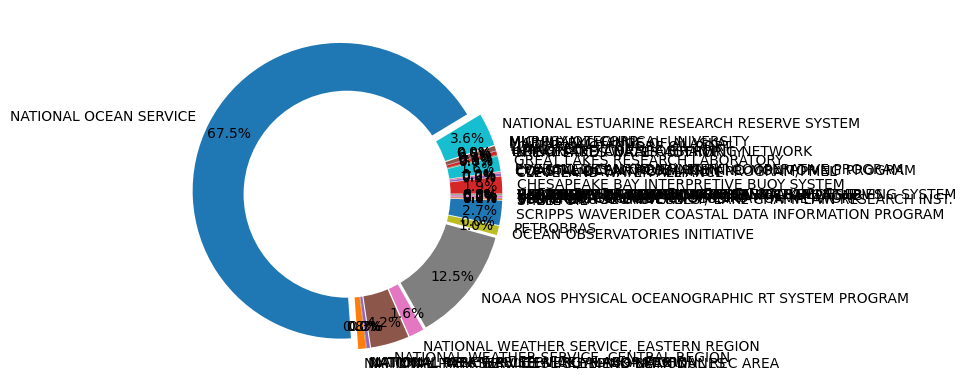

In [3]:
explode = 0.05*np.ones(len(grp_out))

grp_out["total"].plot.pie(rotatelabels=False,
                          autopct="%1.1f%%",
                          ylabel="",
                          textprops={"fontsize":10},
                          #radius=2,
                          pctdistance=0.85,
                          explode=explode)
# draw circle
centre_circle = plt.Circle((0, 0), 0.7, fc="white")
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Above chart is busy, let's group entries <2% into 'OTHER' category

In [4]:
filtered_grp = grp_out.loc[grp_out["pcnt"]>0.02]

filtered_grp.reset_index(inplace=True)

df = pd.DataFrame({"sponsor": "OTHER",
              "total": [grp_out.loc[grp_out["pcnt"]<0.02,"total"].sum()]
              })

df_pie = pd.concat([filtered_grp, df])

df_pie.set_index("sponsor",inplace=True)

df_pie

,met,wave,total,pcnt
sponsor,,,,
NATIONAL ESTUARINE RESEARCH RESERVE SYSTEM,11803798.0,0.0,11803798,0.035873
NATIONAL OCEAN SERVICE,222046882.0,0.0,222046882,0.674823
"NATIONAL WEATHER SERVICE, CENTRAL REGION",13786322.0,0.0,13786322,0.041898
NOAA NOS PHYSICAL OCEANOGRAPHIC RT SYSTEM PROGRAM,41221206.0,0.0,41221206,0.125276
SCRIPPS WAVERIDER COASTAL DATA INFORMATION PROGRAM,106182.0,8626560.0,8732742,0.026540
OTHER,NaN,NaN,31453454,NaN


## Make reduced pie using matplotlib

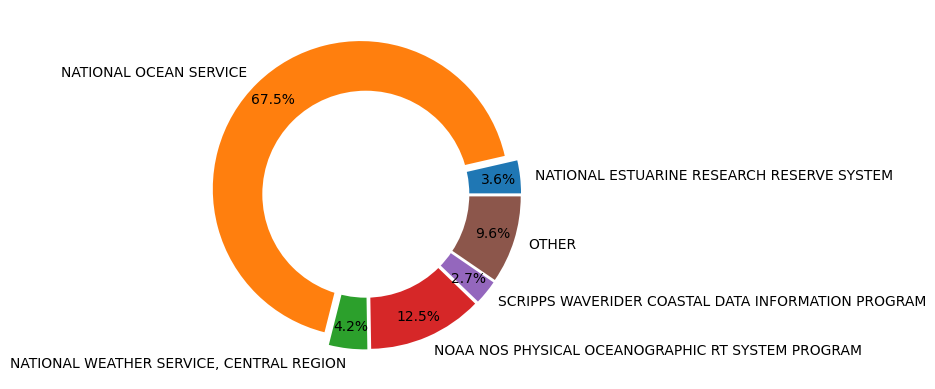

In [5]:
explode = 0.05*np.ones(len(df_pie))

df_pie["total"].plot.pie(rotatelabels=False,
                          autopct="%1.1f%%",
                          ylabel="",
                          textprops={"fontsize":10},
                          #radius=2,
                          pctdistance=0.85,
                          explode=explode)
# draw circle
centre_circle = plt.Circle((0, 0), 0.7, fc="white")
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

## Make reduced pie chart using plotly

In [6]:
import plotly.express as px

fig = px.pie(df_pie,
             values="total",
             names=df_pie.index,
             #title='Distribution of NDBC messages',
             hole=0.6,
             #labels={'lifeExp':'life expectancy'},
             )
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.update(layout_showlegend=False)
fig.show()

What is 'OTHER'?

In [7]:
grp_out.loc[grp_out["pcnt"]<0.02].index.tolist()

['ALASKA OCEAN OBSERVING SYSTEM',
 'BP INC.',
 'CARIBBEAN INTEGRATED COASTAL OCEAN OBSERVING SYSTEM',
 'CHESAPEAKE BAY INTERPRETIVE BUOY SYSTEM',
 'CLEVELAND WATER ALLIANCE',
 'COASTAL DATA INFORMATION PROGRAM/PMEL',
 'COASTAL OCEAN RESEARCH AND MONITORING PROGRAM',
 'EPA & MEXICAN GOVERNMENT COOPERATIVE PROGRAM',
 'EVERGLADES NATIONAL PARK',
 'GREAT LAKES RESEARCH LABORATORY',
 'GREAT LAKES WATER AUTHORITY',
 'ILLINOIS-INDIANA SEA GRANT',
 'INTEGRATED CORAL OBSERVING NETWORK',
 'LIMNOTECH',
 'LOUISIANA OFFSHORE OIL PORT',
 'MARINE EXCHANGE OF ALASKA',
 'MICHIGAN TECHNICAL UNIVERSITY',
 'MOSS LANDING MARINE LABORATORIES',
 'MURPHY OIL CORP.',
 'NATIONAL PARK SERVICE - LAKE MEAD NATIONAL REC AREA',
 'NATIONAL PARK SERVICES - SLEEPING BEAR DUNES',
 'NATIONAL RENEWABLE ENERGY LABORATORY',
 'NATIONAL WEATHER SERVICE, ALASKA REGION',
 'NATIONAL WEATHER SERVICE, EASTERN REGION',
 'OCEAN OBSERVATORIES INITIATIVE',
 'PETROBRAS',
 'SHELL OIL',
 'STONY BROOK UNIVERSITY',
 'SUNY PLATTSBURGH CEES 

# What's NDBC composed of?

In [8]:
df_ndbc["total"] = df_ndbc["met"] + df_ndbc["wave"]
df_ndbc["time (UTC)"] = df_ndbc["time (UTC)"].dt.tz_localize(None)

ndbc_group = df_ndbc.groupby(by=["sponsor"])

grp = ndbc_group[["met","wave","total"]].sum()

grp_out = grp.assign(pcnt = grp["total"] / grp["total"].sum())

grp_out.sort_values(by="pcnt", ascending=False)

,met,wave,total,pcnt
sponsor,,,,
NATIONAL WEATHER SERVICE,47114634,10070708,57185342,0.961360
NATIONAL HURRICANE CENTER,915250,173158,1088408,0.018298
U. S. COAST GUARD,613520,284920,898440,0.015104
CORPS OF ENGINEERS,196298,62876,259174,0.004357
NDBC ENGINEERING,14050,6698,20748,0.000349
SAILDRONE,7702,7684,15386,0.000259
NATIONAL ACADEMY OF SCIENCES,7918,1306,9224,0.000155
GREAT LAKES RESEARCH LABORATORY,2400,2324,4724,0.000079
NATIONAL DATA BUOY CENTER,1180,1180,2360,0.000040


## Make pie chart using matplotlib

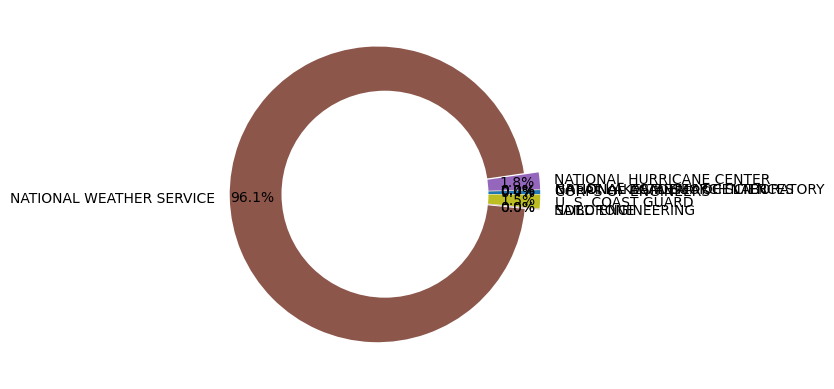

In [9]:
explode = 0.05*np.ones(len(grp_out))

grp_out["total"].plot.pie(rotatelabels=False,
                          autopct="%1.1f%%",
                          ylabel="",
                          textprops={"fontsize":10},
                          #radius=2,
                          pctdistance=0.85,
                          explode=explode)

#draw circle
centre_circle = plt.Circle((0, 0), 0.7, fc="white")
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

## Make pie chart using plotly

In [10]:
import plotly.express as px

fig = px.pie(grp_out,
             values="total",
             names=grp_out.index,
             #title='Distribution of NDBC messages',
             hole=0.6,
             #labels={'lifeExp':'life expectancy'},
             #rotation=90,
             )
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.update(layout_showlegend=False)
fig.show()

# What's IOOS composed of?

In [11]:
df_ioos["total"] = df_ioos["met"] + df_ioos["wave"]
df_ioos["time (UTC)"] = df_ioos["time (UTC)"].dt.tz_localize(None)

ioos_group = df_ioos.groupby(by=["sponsor"])

grp = ioos_group[["met","wave","total"]].sum()

grp_out = grp.assign(pcnt = grp["total"] / grp["total"].sum())

grp_out.sort_values(by="pcnt", ascending=False)

,met,wave,total,pcnt
sponsor,,,,
TEXAS COASTAL OCEAN OBSERVATION NETWORK,25840950,0,25840950,0.330747
MARINE EXCHANGE OF ALASKA,20867546,0,20867546,0.267091
USF COMPS MARINE NETWORK,4780472,0,4780472,0.061187
CARIBBEAN INTEGRATED COASTAL OCEAN OBSERVING SYSTEM,2957646,585526,3543172,0.045350
SCRIPPS WAVERIDER COASTAL DATA INFORMATION PROGRAM,0,3207372,3207372,0.041052
LIMNOTECH,1462626,1141056,2603682,0.033325
MICHIGAN TECHNICAL UNIVERSITY,1170326,1112668,2282994,0.029221
COASTAL OCEAN RESEARCH AND MONITORING PROGRAM,1205692,379864,1585556,0.020294
CALIFORNIA POLYTECHNIC STATE UNIVERSITY,1232956,0,1232956,0.015781


## Make pie chart using matplotlib

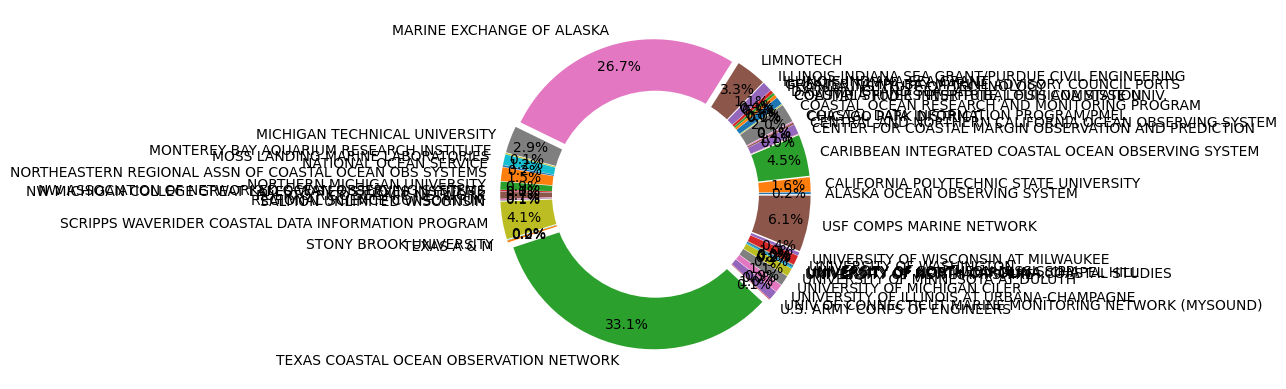

In [12]:
explode = 0.05*np.ones(len(grp_out))

grp_out["total"].plot.pie(rotatelabels=False,
                          autopct="%1.1f%%",
                          ylabel="",
                          textprops={"fontsize":10},
                          #radius=2,
                          pctdistance=0.85,
                          explode=explode)
# draw circle
centre_circle = plt.Circle((0, 0), 0.7, fc="white")
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

## Make pie chart using plotly

In [13]:
import plotly.express as px

fig = px.pie(grp_out,
             values="total",
             names=grp_out.index,
             #title='Distribution of NDBC messages',
             hole=0.6,
             #labels={'lifeExp':'life expectancy'},
             )
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.update(layout_showlegend=False)
fig.show()

# Chart above is busy, let's make 'OTHER' category

In [14]:
filtered_grp = grp_out.loc[grp_out["pcnt"]>0.02]

filtered_grp.reset_index(inplace=True)

df = pd.DataFrame({"sponsor": "OTHER",
              "total": [grp_out.loc[grp_out["pcnt"]<0.02,"total"].sum()]
              })

df_pie = pd.concat([filtered_grp, df])

df_pie

,sponsor,met,wave,total,pcnt
0,CARIBBEAN INTEGRATED COASTAL OCEAN OBSERVING S...,2957646.0,585526.0,3543172,0.045350
1,COASTAL OCEAN RESEARCH AND MONITORING PROGRAM,1205692.0,379864.0,1585556,0.020294
2,LIMNOTECH,1462626.0,1141056.0,2603682,0.033325
3,MARINE EXCHANGE OF ALASKA,20867546.0,0.0,20867546,0.267091
4,MICHIGAN TECHNICAL UNIVERSITY,1170326.0,1112668.0,2282994,0.029221
5,SCRIPPS WAVERIDER COASTAL DATA INFORMATION PRO...,0.0,3207372.0,3207372,0.041052
6,TEXAS COASTAL OCEAN OBSERVATION NETWORK,25840950.0,0.0,25840950,0.330747
7,USF COMPS MARINE NETWORK,4780472.0,0.0,4780472,0.061187
0,OTHER,NaN,NaN,13417236,NaN


## Make reduced pie chart using matplotlib

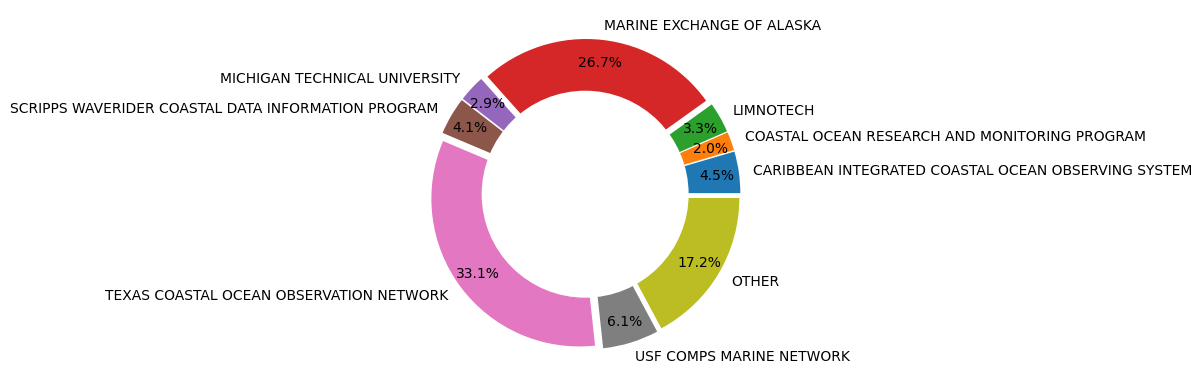

In [15]:
explode = 0.05*np.ones(len(df_pie))

df_pie.set_index("sponsor",inplace=True)

df_pie["total"].plot.pie(rotatelabels=False,
                          autopct="%1.1f%%",
                          ylabel="",
                          textprops={"fontsize":10},
                          #radius=2,
                          pctdistance=0.85,
                          explode=explode)
# draw circle
centre_circle = plt.Circle((0, 0), 0.7, fc="white")
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

## Make reduced pie chart using plotly

In [16]:
import plotly.express as px

fig = px.pie(df_pie,
             values="total",
             names=df_pie.index,
             #title='Distribution of NDBC messages',
             hole=0.6,
             #labels={'lifeExp':'life expectancy'},
             )
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.update(layout_showlegend=False)
fig.show()

What is 'OTHER'?

In [17]:
grp_out.loc[grp_out["pcnt"]<0.02].index.tolist()

['ALASKA OCEAN OBSERVING SYSTEM',
 'CALIFORNIA POLYTECHNIC STATE UNIVERSITY',
 'CENTER FOR COASTAL MARGIN OBSERVATION AND PREDICTION',
 'CENTRAL AND NORTHERN CALIFORNIA OCEAN OBSERVING SYSTEM',
 'CHICAGO PARK DISTRICT',
 'COASTAL DATA INFORMATION PROGRAM/PMEL',
 'COASTAL STUDIES INSTITUTE, LOUISIANA STATE UNIV.',
 'COLUMBIA RIVER INTER-TRIBAL FISH COMMISSION',
 'DAUPHIN ISLAND SEA LAB',
 'FLORIDA INSTITUTE OF TECHNOLOGY',
 'GREATER TAMPA BAY MARINE ADVISORY COUNCIL PORTS',
 'ILLINOIS-INDIANA SEA GRANT',
 'ILLINOIS-INDIANA SEA GRANT/PURDUE CIVIL ENGINEERING',
 'MONTEREY BAY AQUARIUM RESEARCH INSTITUTE',
 'MOSS LANDING MARINE LABORATORIES',
 'NATIONAL OCEAN SERVICE',
 'NORTHEASTERN REGIONAL ASSN OF COASTAL OCEAN OBS SYSTEMS',
 'NORTHERN MICHIGAN UNIVERSITY',
 'NW ASSOCIATION OF NETWORKED OCEAN OBSERVING SYSTEMS',
 'NW MICHIGAN COLLEGE GREAT LAKES WATER STUDIES INSTITUTE',
 'PUERTO RICO SEISMIC NETWORK',
 'REGIONAL SCIENCE CONSORTIUM',
 'SALMON UNLIMITED WISCONSIN',
 'STONY BROOK UNIVERSI

Let us check the monthly sum of data released both for individual met and wave and the totals.

In [18]:
import pandas as pd

df_out["time (UTC)"] = df_out["time (UTC)"].dt.tz_localize(None)

groups = df_out[["time (UTC)","met","wave"]].groupby(pd.Grouper(key="time (UTC)", freq="M"))

<Axes: xlabel='time (UTC)'>

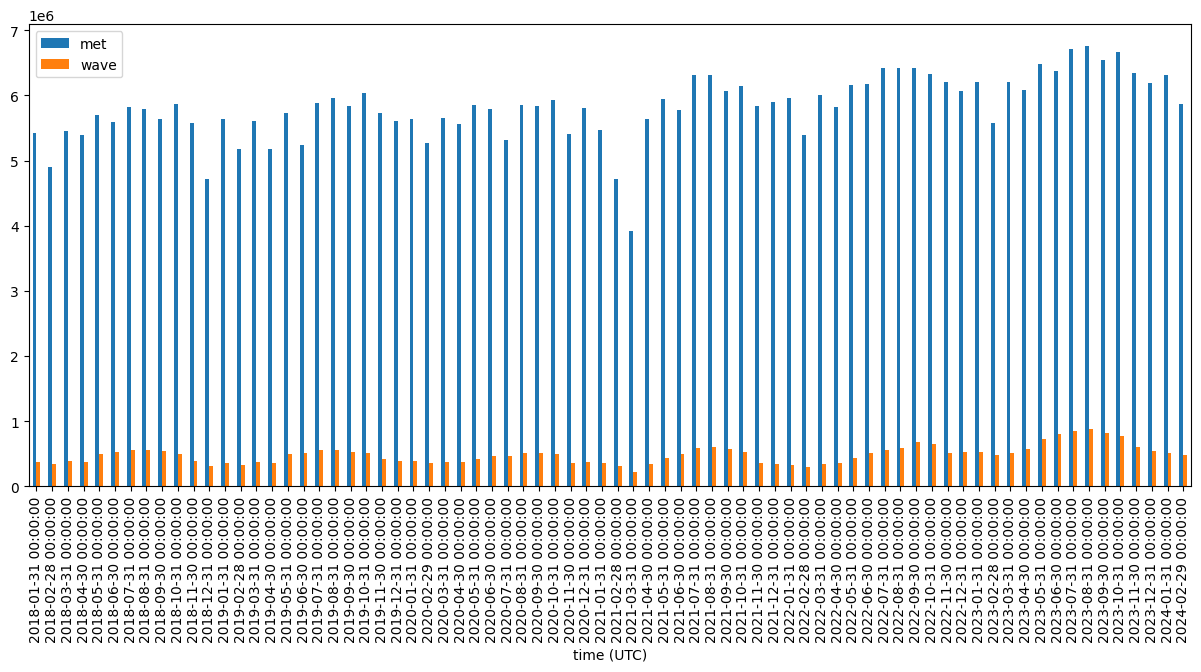

In [19]:
groups.sum().plot(kind="bar",figsize=(15,6))

We can create a table of observations per month,

In [20]:
s = groups[
    [ "met", "wave"]
].sum()  # reducing the columns so the summary is digestable
totals = s.assign(total=s["met"] + s["wave"])
totals.index = totals.index.to_period("M")

print(f"Monthly totals:\n{totals}\n")

print(
    f"Sum for time period {totals.index.min()} to {totals.index.max()}: {totals['total'].sum()}"
)

Monthly totals:
                met    wave    total
time (UTC)                          
2018-01     5416106  368948  5785054
2018-02     4906308  337780  5244088
2018-03     5454492  382206  5836698
2018-04     5388108  379066  5767174
2018-05     5696122  490110  6186232
...             ...     ...      ...
2023-10     6672156  767336  7439492
2023-11     6341764  602932  6944696
2023-12     6195258  536102  6731360
2024-01     6320006  516370  6836376
2024-02     5864056  488424  6352480

[74 rows x 3 columns]

Sum for time period 2018-01 to 2024-02: 466961664


and visualize it in a bar chart.

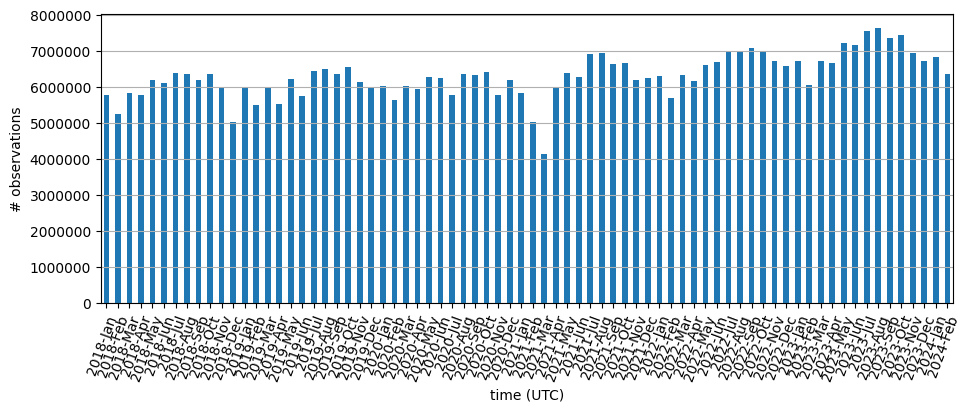

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(11, 3.75))

totals["total"].plot(ax=ax, kind="bar",stacked=True)
ax.set_xticklabels(
    labels=s.index.to_series().dt.strftime("%Y-%b"),
    rotation=70,
    rotation_mode="anchor",
    ha="right",
)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.set_ylabel("# observations")
ax.grid(axis="y")

Group by source, then by month

In [22]:
group = df_out.groupby(by=["source", pd.Grouper(key="time (UTC)", freq="M")])


s = group[
    ["met", "wave"]
].sum()  # reducing the columns so the summary is digestable

totals = s.assign(total=s["met"] + s["wave"])

totals.reset_index(["source"], inplace=True)

totals.index = totals.index.to_period("M").strftime("%Y-%b")

totals

,source,met,wave,total
time (UTC),,,,
2018-Jan,IOOS,701780,63624,765404
2018-Feb,IOOS,676688,61886,738574
2018-Mar,IOOS,759916,69014,828930
2018-Apr,IOOS,773482,75758,849240
2018-May,IOOS,890444,155768,1046212
...,...,...,...,...
2023-Oct,non-NDBC,4699234,331094,5030328
2023-Nov,non-NDBC,4514266,249716,4763982
2023-Dec,non-NDBC,4457820,224472,4682292


# Create stacked bar chart

IOOS + non-NDBC + NDBC

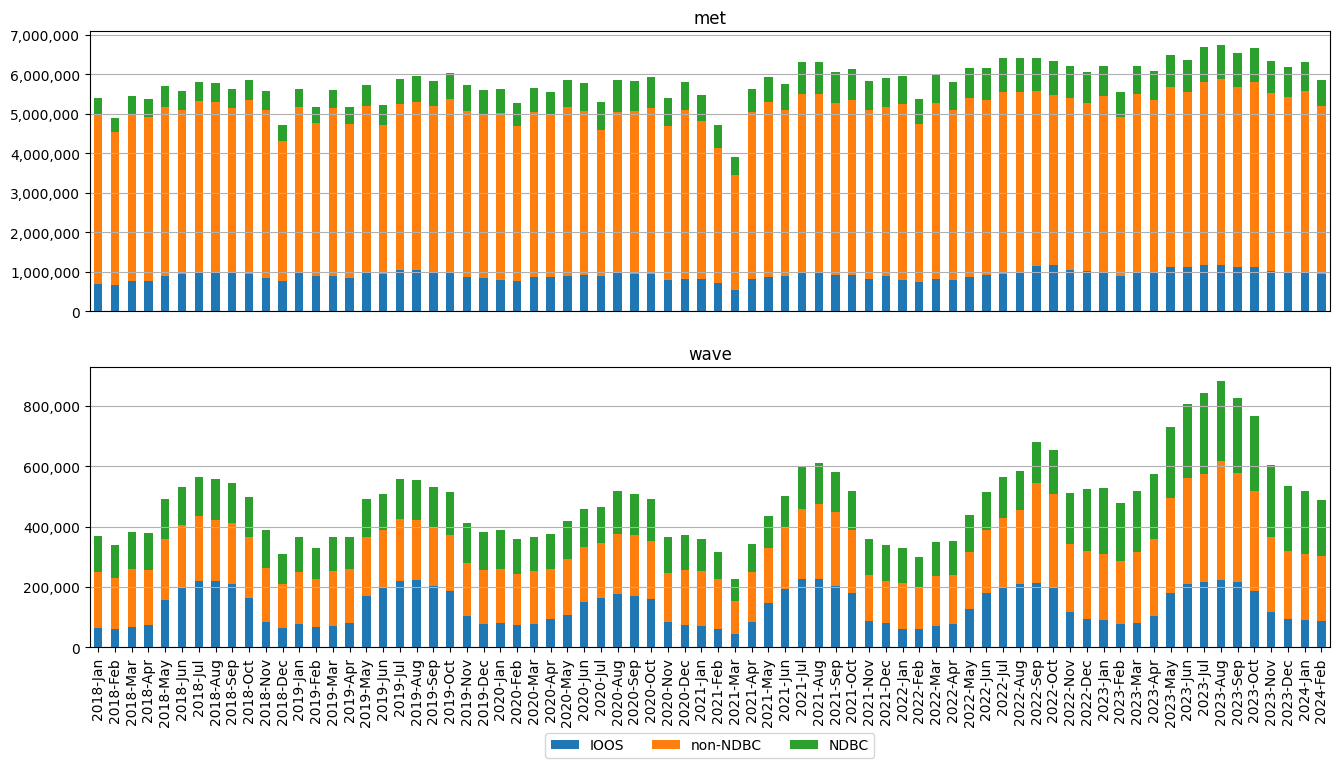

In [23]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(16,8))

df_met = pd.DataFrame({"IOOS": totals.loc[totals["source"]=="IOOS","met"],
                         "non-NDBC": totals.loc[totals["source"]=="non-NDBC","met"],
                         "NDBC": totals.loc[totals["source"]=="NDBC","met"],
                         },
                         index= totals.index.unique())

df_met.plot.bar(stacked=True, xlabel="", ax=axs[0], rot=90, title="met")

axs[0].get_legend().remove()

axs[0].grid(axis="y")

axs[0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ",")))
axs[0].axes.get_xaxis().set_visible(False)

df_wave = pd.DataFrame({"IOOS": totals.loc[totals["source"]=="IOOS","wave"],
                         "non-NDBC": totals.loc[totals["source"]=="non-NDBC","wave"],
                         "NDBC": totals.loc[totals["source"]=="NDBC","wave"],
                         },
                         index= totals.index.unique())

df_wave.plot.bar(stacked=True, xlabel="", ax=axs[1], title="wave")

axs[1].legend(loc="center",bbox_to_anchor=(0.5,-0.35,0,0),ncol=3)

axs[1].grid(axis="y")

axs[1].yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ",")))

In [24]:
df_total = df_met + df_wave
df_total

,IOOS,non-NDBC,NDBC
time (UTC),,,
2018-Jan,765404,4488860,530790
2018-Feb,738574,4028584,476930
2018-Mar,828930,4423008,584760
2018-Apr,849240,4333812,584122
2018-May,1046212,4502094,637926
...,...,...,...
2023-Oct,1305808,5030328,1103356
2023-Nov,1129076,4763982,1051638
2023-Dec,1073466,4682292,975602


# Create stacked chart

IOOS + non-IOOS (non-NDBC + NDBC)

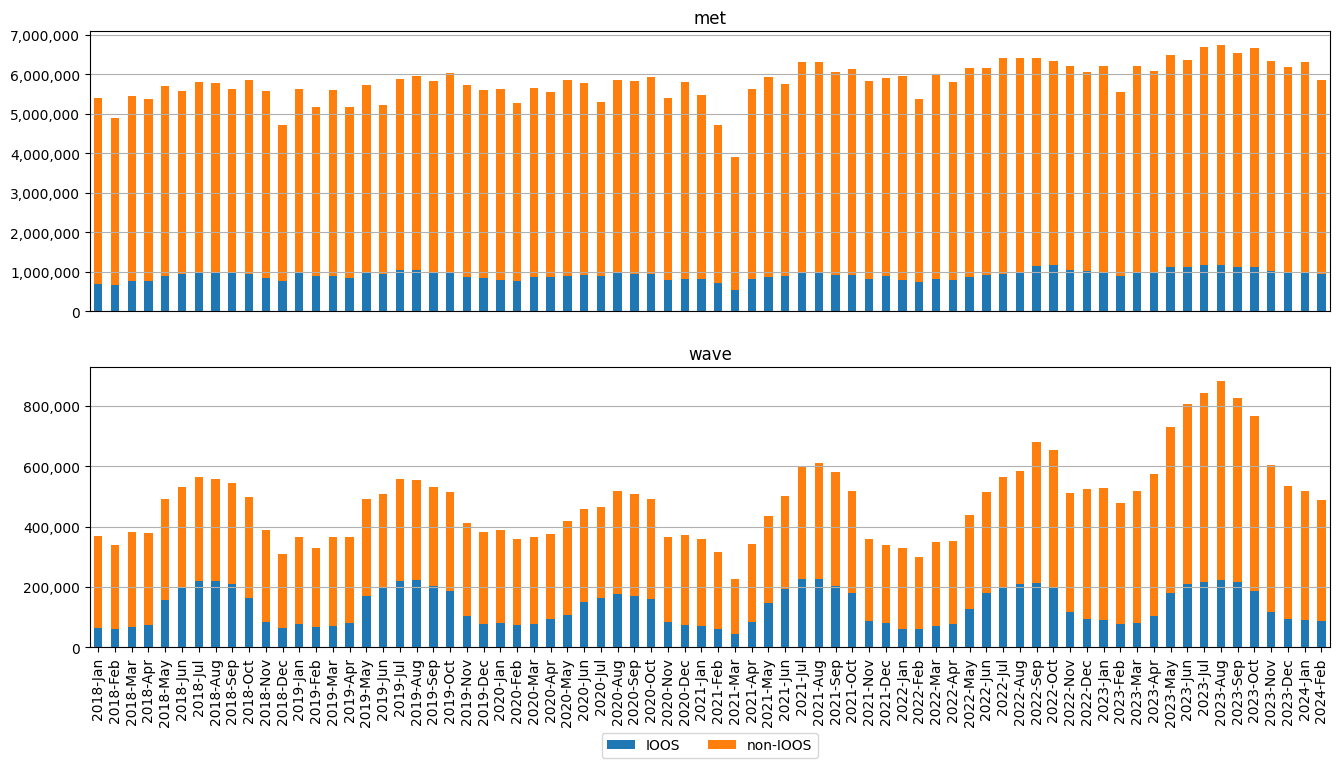

In [25]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

color = {"IOOS":"C0",
         "non-IOOS": "C1"}

fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(16,8))

df_met = pd.DataFrame({"IOOS": totals.loc[totals["source"]=="IOOS","met"],
                       "non-IOOS": totals.loc[totals["source"]=="NDBC","met"]+totals.loc[totals["source"]=="non-NDBC","met"],
                         },
                         index= totals.index.unique())

df_met.plot.bar(stacked=True,
                  xlabel="",
                  ax=axs[0],
                  rot=90,
                  title="met",
                  color=color)

axs[0].get_legend().remove()

axs[0].grid(axis="y")

axs[0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ",")))
axs[0].axes.get_xaxis().set_visible(False)

df_wave = pd.DataFrame({"IOOS": totals.loc[totals["source"]=="IOOS","wave"],
                         "non-IOOS": totals.loc[totals["source"]=="NDBC","wave"]+totals.loc[totals["source"]=="non-NDBC","wave"],
                         },
                         index= totals.index.unique())

df_wave.plot.bar(
    stacked=True,
    xlabel="",
    ax=axs[1],
    title="wave",
    color=color)

axs[1].legend(loc="center",
              bbox_to_anchor=(0.5,-0.35,0,0),
              ncol=3)

axs[1].grid(axis="y")

axs[1].yaxis.set_major_formatter(
    FuncFormatter(lambda x, p: format(int(x), ","))
    )


co-ops = non-ndbc['NATIONAL OCEAN SERVICE'] + non-ndbc['NOAA NOS PHYSICAL OCEANOGRAPHIC RT SYSTEM PROGRAM']

ioos-regional = ioos_regional['met'] +ioos_regional['wave']

nerrs = non-ndbc['NATIONAL ESTUARINE RESEARCH RESERVE SYSTEM']

other = ndbc['total'] + non-ndbc NWS-regional + CBIBS + National Park Service + USACE (not including CDIP stations owned by RAs) + all other NDBC partners (including nonfederal partners outside of IOOS).
 anything not Ocean Service


Ocean Service contributions compared to the total.

split into met and wave

# NOS & non-NOS

In [26]:
df_out["LO"]=pd.Series(dtype=str)
df_out.loc[df_out["sponsor"]=="NATIONAL OCEAN SERVICE","LO"] = "NOS"
df_out.loc[df_out["sponsor"]=="NOAA NOS PHYSICAL OCEANOGRAPHIC RT SYSTEM PROGRAM","LO"] = "NOS"
df_out.loc[df_out["source"]=="IOOS","LO"] = "NOS"

df_out.loc[df_out["LO"].isna(),"LO"] = "non-NOS"

What are we classifying as non-NOS?

In [27]:
df_out.loc[df_out["LO"]=="non-NOS","sponsor"].unique().tolist()

['CORPS OF ENGINEERS',
 'NATIONAL HURRICANE CENTER',
 'NATIONAL WEATHER SERVICE',
 'U. S. COAST GUARD',
 nan,
 'NDBC ENGINEERING',
 'NATIONAL DATA BUOY CENTER',
 'GREAT LAKES RESEARCH LABORATORY',
 'NATIONAL ACADEMY OF SCIENCES',
 'SAILDRONE',
 'BP INC.',
 'EPA & MEXICAN GOVERNMENT COOPERATIVE PROGRAM',
 'CHESAPEAKE BAY INTERPRETIVE BUOY SYSTEM',
 'SCRIPPS WAVERIDER COASTAL DATA INFORMATION PROGRAM',
 'EVERGLADES NATIONAL PARK',
 'INTEGRATED CORAL OBSERVING NETWORK',
 'LOUISIANA OFFSHORE OIL PORT',
 'MOSS LANDING MARINE LABORATORIES',
 'NATIONAL ESTUARINE RESEARCH RESERVE SYSTEM',
 'NATIONAL PARK SERVICE - LAKE MEAD NATIONAL REC AREA',
 'NATIONAL RENEWABLE ENERGY LABORATORY',
 'NATIONAL WEATHER SERVICE, ALASKA REGION',
 'NATIONAL WEATHER SERVICE, CENTRAL REGION',
 'NATIONAL WEATHER SERVICE, EASTERN REGION',
 'OCEAN OBSERVATORIES INITIATIVE',
 'PETROBRAS',
 'SHELL OIL',
 'U.S. ARMY CORPS OF ENGINEERS',
 'WOODS HOLE OCEANOGRAPHIC INSTITUTION',
 'VERMONT EPSCOR',
 'NATIONAL PARK SERVICES 

## Group by the new LO column

In [28]:
group = df_out.groupby(by=["LO", pd.Grouper(key="time (UTC)", freq="M")])

s = group[
    ["met", "wave"]
].sum()  # reducing the columns so the summary is digestable

totals = s.assign(total=s["met"] + s["wave"])

totals.reset_index(["LO"], inplace=True)

totals.index = totals.index.to_period("M").strftime("%Y-%b")

totals

,LO,met,wave,total
time (UTC),,,,
2018-Jan,NOS,4350064,63624,4413688
2018-Feb,NOS,3947286,61886,4009172
2018-Mar,NOS,4360558,69014,4429572
2018-Apr,NOS,4290340,75758,4366098
2018-May,NOS,4530964,155768,4686732
...,...,...,...,...
2023-Oct,non-NOS,1758336,579780,2338116
2023-Nov,non-NOS,1613288,486862,2100150
2023-Dec,non-NOS,1532968,441676,1974644


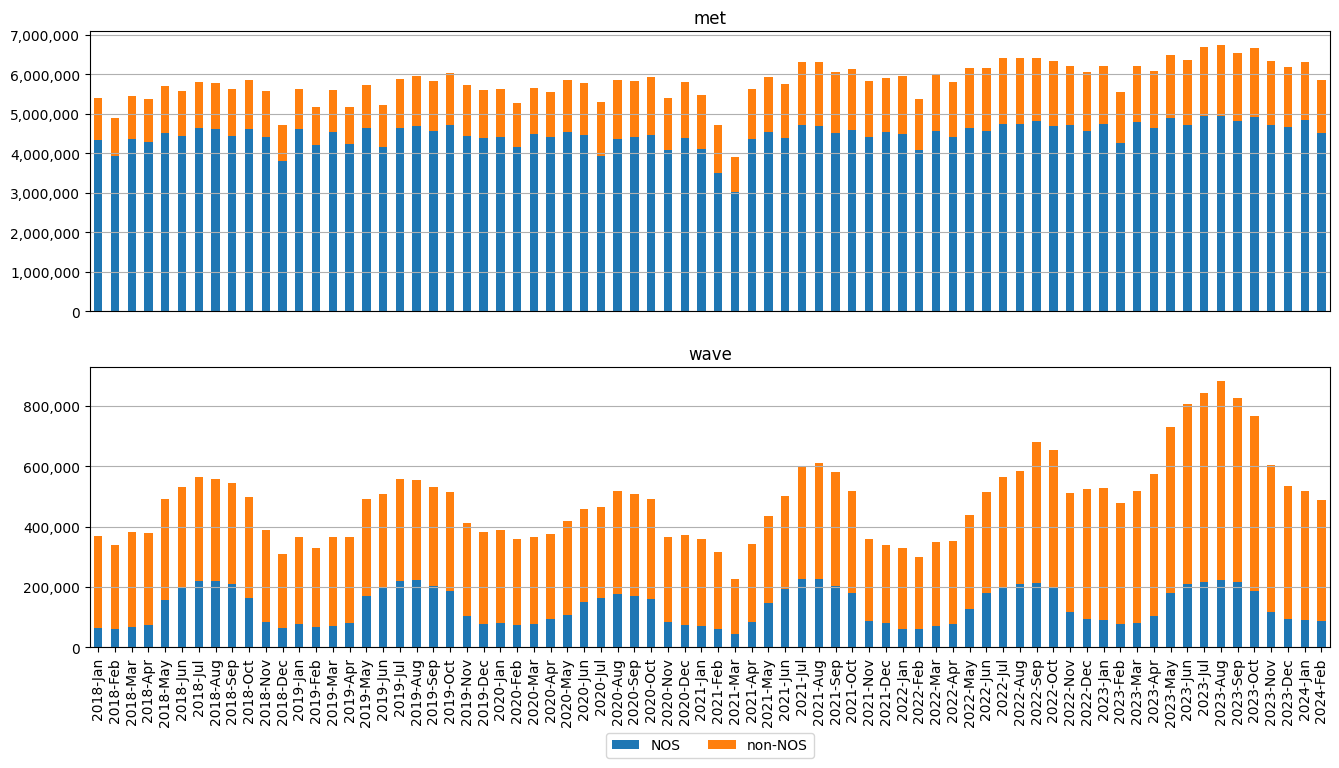

In [29]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

color = {"NOS":"C0",
         "non-NOS": "C1"}

fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(16,8))


# first chart
df_met = pd.DataFrame({"NOS": totals.loc[totals["LO"]=="NOS","met"],
                         "non-NOS": totals.loc[totals["LO"]=="non-NOS","met"],
                         "nos-percent":totals.loc[totals["LO"]=="NOS","met"] / (totals.loc[totals["LO"]=="NOS","met"] + totals.loc[totals["LO"]=="non-NOS","met"])
                         },
                         index= totals.index.unique())

bar = df_met[["NOS","non-NOS"]].plot.bar(stacked=True, xlabel="", ax=axs[0], rot=90, title="met", color=color)

axs[0].get_legend().remove()

axs[0].grid(axis="y")

axs[0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ",")))
axs[0].axes.get_xaxis().set_visible(False)
#axs[0].bar_label(bar,df_wave['percent'])


# second chart
df_wave = pd.DataFrame({"NOS": totals.loc[totals["LO"]=="NOS","wave"],
                         "non-NOS": totals.loc[totals["LO"]=="non-NOS","wave"],
                         "nos-percent":totals.loc[totals["LO"]=="NOS","wave"] / (totals.loc[totals["LO"]=="NOS","wave"] + totals.loc[totals["LO"]=="non-NOS","wave"])
                         },
                         index= totals.index.unique())

df_wave[["NOS","non-NOS"]].plot.bar(stacked=True, xlabel="", ax=axs[1], title="wave", color=color)

axs[1].legend(loc="center",bbox_to_anchor=(0.5,-0.35,0,0),ncol=3)

axs[1].grid(axis="y")

axs[1].yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ",")))

In [30]:
df_all = df_met + df_wave

df_all["nos-percent"] = df_all["NOS"] / (df_all["NOS"] + df_all["non-NOS"])

df_all

,NOS,non-NOS,nos-percent
time (UTC),,,
2018-Jan,4413688,1371366,0.762947
2018-Feb,4009172,1234916,0.764513
2018-Mar,4429572,1407126,0.758917
2018-Apr,4366098,1401076,0.757060
2018-May,4686732,1499500,0.757607
...,...,...,...
2023-Oct,5101376,2338116,0.685716
2023-Nov,4844546,2100150,0.697589
2023-Dec,4756716,1974644,0.706650


# Calculate the percent contributions per year

In [31]:
all = df_all.reset_index()
all["time (UTC)"] = pd.to_datetime(all["time (UTC)"])
year_group = all.groupby(by=pd.Grouper(key="time (UTC)", freq="Y"))
s = year_group[["NOS","non-NOS"]].sum()

year_totals = s.assign(nos_percent=s["NOS"] / ( s["NOS"]+ s["non-NOS"]))

year_totals.index = year_totals.index.to_period("M").strftime("%Y")

year_totals

,NOS,non-NOS,nos_percent
time (UTC),,,
2018,54063850,17153684,0.759137
2019,55582460,17399994,0.761587
2020,53539838,19468350,0.733340
2021,53032882,20170004,0.724464
2022,56699818,22449876,0.716362
2023,58911340,25300712,0.699559
2024,9566880,3621976,0.725376


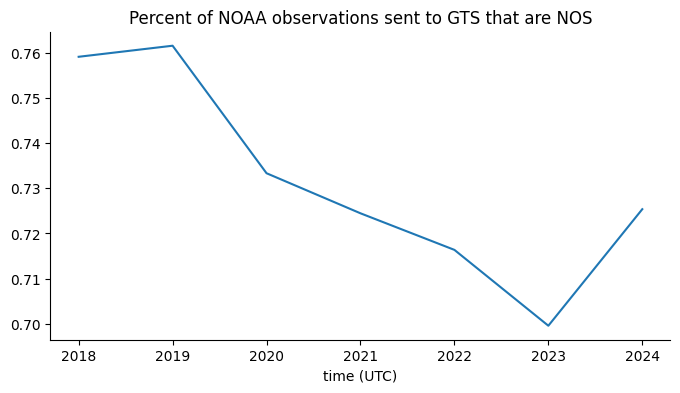

In [33]:
# @title nos_percent

from matplotlib import pyplot as plt

year_totals["nos_percent"].plot(kind="line", figsize=(8, 4), title="Percent of NOAA observations sent to GTS that are NOS")
plt.gca().spines[["top", "right"]].set_visible(False)